# CHAPTER 6: Entropy and Divergence

### This code runs simulation for Example 16, and generates Figure 5 from Chapter 6: Entropy and Divergence (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

## *Example 6.16 - Natural gradients and Riemannian geometry*

When minimizing over distributions, the natural gradient construction Eq. ($6.131$) ends up employing the inverse of the Fisher information matrix, which we know from Eq. ($6.131$) is related to the curvature (inverse Hessian) of the KL divergence of $p_{\mathbf{x}}(x;\theta)$ and $p_{\mathbf{x}}(x;\theta')$ as $\theta' \rightarrow \theta$.

We can motivate similar natural gradient constructions for more generic optimization problems that need not be limited to the space of probability distributions:

$$
\theta^{o} = \underset{\theta \in \mathbb{R}^M}{\mbox{argmin}\,\,} J(\theta) \quad \text{(6.145)}
$$

In problem ($6.127$), we sought the optimal solution $\theta^o$ by requiring the successive pdfs to lie on a surface of constant KL divergence. We can pursue a similar construction for more general surfaces, other than probability measures. This is because natural gradient implementations are well-suited for optimization over what is known as **Riemannian manifolds.** Manifolds are generalizations of the notion of surfaces to higher dimensions. For example, a sphere or a torus are three-dimensional manifolds. Riemannian manifolds are a particular class of manifolds over which the notions of distances, angles, and curvatures can be defined and measured. We do not need to provide a rigorous treatment of Riemannian manifolds here; it is sufficient to motivate the concept informally.

Thus, recall that in Euclidean space we can measure (and define) the distance between two vectors, say, $\{p,p+\delta p\} \in \mathbb{R}^{M}$, by computing their Euclidean distance (or the square of it) defined as:

$$
d^2_{E}(p,p+\delta p) = \sum_{\ell=1}^M\;(\delta p_{\ell})^2 = \|\delta p\|^2 = (\delta p)^{\top} \delta p \quad \text{(6.146)}
$$

For example, on the plane, this distance metric leads to the convention that the shortest distance between two points is a straight line. However, on curved surfaces, such as on the surface of a sphere, the shortest distance between two points is instead the shortest **arc** connecting them. Riemannian geometry is the branch of geometry that deals with curved spaces of this nature in higher dimensions. The curve with the smallest length that connects two points on a Riemannian manifold is called a **geodesic**.

We associate a metric tensor (also called a *Riemann tensor*) with every point on a Riemannian manifold; loosely, it is a quantity that allows us to measure distances. For Riemannian surfaces in $\mathbb{R}^{M}$, we denote the metric tensor by $G(q)$ at location $q$; it is an $M \times M$ positive-definite matrix that is dependent on $q$. Using the metric tensor, the (squared) distance between two close points $q$ and $q+\delta q$ on the Riemannian manifold is defined by:

$$
d^{2}_{R}(q,q+\delta q) = \sum_{\ell=1}^M \sum_{n=1}^M \delta q_{\ell} G_{\ell n} \delta q_n = (\delta q)^{\top} G(q) \delta q
 \quad \text{(6.147)}
$$

where the $\{G_{\ell n}\}$ denote the entries of the matrix $G(q)$. The natural gradient method for minimizing a cost function $J(\theta)$ over Riemannian geometry replaces the inverse Hessian in the Newton method by the inverse of the curvature matrix, i.e., it uses:

$$
\theta_m = \theta_{m-1} - \mu \Bigl(G(\theta_{m-1})\Bigr)^{-1} \nabla J_{\theta^{\top}}(\theta_{m-1}), \quad m \geq 0 \quad \text{(6.148)}
$$

where $\mu > 0$ is a small step-size parameter. This update ensures that the successive iterates travel over the manifold defined by $G(q)$, just like formulation ($6.127$) ensures that the successive iterates travel over the manifold of constant KL values. In particular, over the space of probability distributions, we showed in ($6.97$) that the curvature of the KL measure is given by the Fisher information matrix, which explains its use in ($6.131$).

Returning to Example$~6.14$, let us evaluate the curvature matrix of the manifold described by $J(r,\phi)$ and shown in the lower plot of Fig.$~6.14$. Consider a point $p=\text{col}\{x,y\}$ in Cartesian coordinates and the corresponding point $q=\text{col}\{r,\phi\}$ in polar coordinates, where $r=x\cos\phi$ and $y=r\sin\phi$. Assume $q$ is perturbed slightly to $q+\delta q$ where $\delta q=\text{col}\{\delta r, \delta \phi\}$. The corresponding point $p$ is perturbed to $p+\delta p$ where 

$$
p = \begin{bmatrix}
r\cos(\phi) \\
r\sin(\phi)
\end{bmatrix}, \quad 
p + \delta p = \begin{bmatrix}
(r+\delta r)\cos(\phi+\delta \phi) \\
(r+\delta r)\sin(\phi+\delta \phi)
\end{bmatrix} \quad \text{(6.149)}
$$

Using the approximations 

$$
\cos(\delta\phi) \approx 1, \quad \sin(\delta\phi) \approx \delta \phi \quad \text{(6.150)}
$$

and ignoring products involving $\delta r$ and $\delta \phi$, we find

$$
\delta p \approx \begin{bmatrix}
-r\delta\phi\sin(\phi) + \delta r\cos(\phi) \\
r\delta\phi\cos(\phi) + \delta r \sin(\phi)
\end{bmatrix} \quad \text{(6.151)}
$$

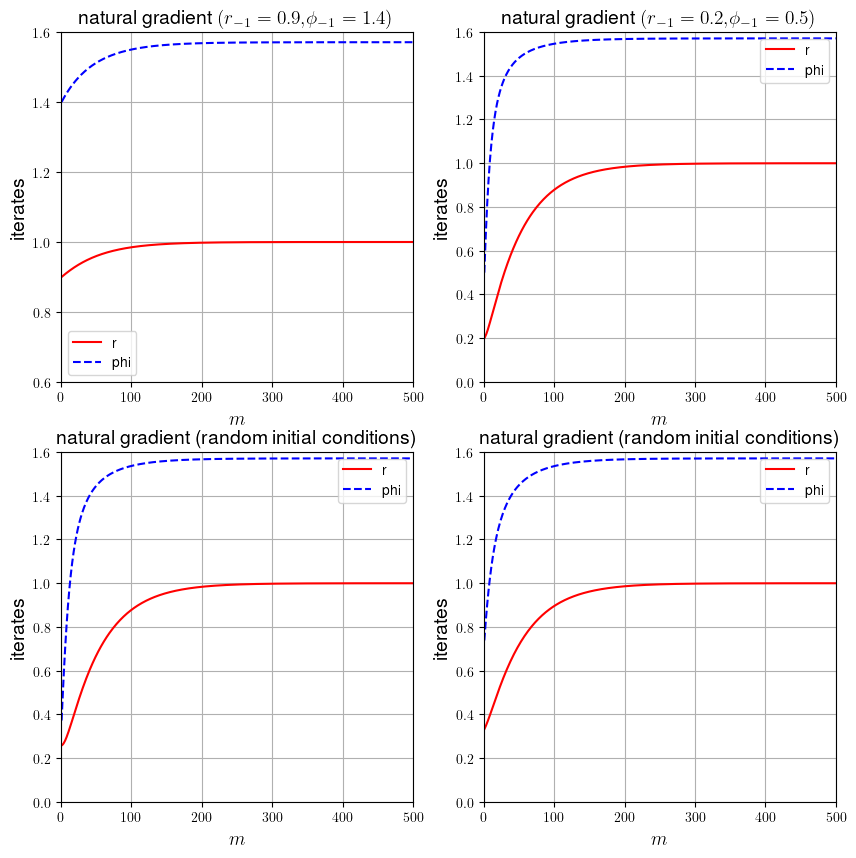

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Natural gradient recursion in polar coordinates
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = 0.9 # one set of initial conditions
phi[0] = 1.4

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

## figure 5 (natural gradient recursion with different initial conditions)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(range(1, M+1), r, 'r', label='r')
plt.plot(range(1, M+1), phi, '--b', label='phi')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
normal_text = "natural gradient"
latex_expression = r'$(r_{-1}=0.9$$, $$\phi_{-1}=1.4)$'
title_text = normal_text + " " + latex_expression
plt.title(title_text, fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0.6, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0.6,1.6])
plt.grid()
plt.legend()


# a second set of initial conditions
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = 0.2
phi[0] = 0.5

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

plt.subplot(222)
plt.plot(range(1, M+1), r, 'r', label='r')
plt.plot(range(1, M+1), phi, '--b', label='phi')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
normal_text = "natural gradient"
latex_expression = r'$(r_{-1}=0.2$$, $$\phi_{-1}=0.5)$'
title_text = normal_text + " " + latex_expression
plt.title(title_text, fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0,1.6])
plt.grid()
plt.legend()


# a fourth set of initial conditions
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = np.random.rand()
phi[0] = np.random.rand()

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

plt.subplot(223)
plt.plot(range(1, M+1), r, 'r', label='r')
plt.plot(range(1, M+1), phi, '--b', label='phi')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.title('natural gradient (random initial conditions)', fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0,1.6])
plt.grid()
plt.legend()

# a third set of initial conditions
M = 500
m = 1
r = np.zeros(M)
phi = np.zeros(M)
r[0] = np.random.rand()
phi[0] = np.random.rand()

mu = 0.01

for m in range(1,M) :
   a = 2*(r[m-1]-np.sin(phi[m-1]))
   b = -(2/r[m-1])*np.cos(phi[m-1])
   r[m]= r[m-1] - mu*a
   phi[m] = phi[m-1] - mu*b

plt.subplot(224)
plt.plot(range(1, M+1), r, 'r', label='r')
plt.plot(range(1, M+1), phi, '--b', label='phi')
plt.xlabel('$m$', fontsize=14)
plt.ylabel('iterates', fontsize=14)
plt.title('natural gradient (random initial conditions)', fontsize=14)
plt.xticks(np.arange(0, 600, 100))
plt.yticks(np.arange(0, 1.7, 0.2))
plt.xlim([0,500])
plt.ylim([0,1.6])
plt.grid()
plt.legend()


plt.show()

**Figure $6.5$** Evolution of the iterates $(r_m,\phi_m)$ for the natural gradient recursion ($6.156$) for different choices of the initial conditions. The plots converge to the location of the global minimizer at $(r^o,\phi^o)=(1,\pi/2)$

It follows that the Euclidean distance between $p$ and $p+\delta p$ is given by

$$ 
d_{E}^2(p,p+\delta p) \approx r^2(\delta\phi)^2 + (\delta r)^2 \quad \text{(6.152)}
$$

We can determine the curvature tensor at location $q$ by imposing a distance invariance requirement:
    
$$
d_{E}^2(p,p+\delta p) = d_{R}^2(q,q+\delta q) = (\delta q)^T G(q)(\delta q) \quad \text{(6.153)}
$$

That is, it must hold that 

$$
r^2(\delta\phi)^2 + (\delta r)^2 = \begin{bmatrix}\delta r & \delta \phi\end{bmatrix} G(q) \begin{bmatrix}\delta r \\\delta \phi\end{bmatrix} \quad \text{(6.154)}
$$

which allows us to identify, for this example,

$$
G(q) = \begin{bmatrix}1 & 0 \\ 0 & r^2\end{bmatrix} \quad \text{(6.155)}
$$

In this way, the natural gradient recursion ($6.148$) reduces to

$$
\begin{bmatrix}r_m\\\phi_m\end{bmatrix} =
\begin{bmatrix}r_{m-1}\\\phi_{m-1}\end{bmatrix}
-\mu \begin{bmatrix}2(r_{m-1}-\sin\phi_{m-1})\\-(2/r_{m-1})\cos\phi_{m-1}\end{bmatrix} \quad \text{(6.156)}
$$

We apply this recursion to the same objective $J(r,\theta)$ from Example$~6.14$ using again $\mu=0.01$, $M=500$ iterations, and the same initial conditions, in addition to other randomly chosen initial conditions. As seen in Fig.$~6.15$, the iterates now converge to the global minimizer $(r^o,\phi^o)=(1,\pi/2)$ in all simulated cases.

